<a href="https://colab.research.google.com/github/RoRdil31/Data-Science23_TermProject/blob/main/DS_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Step 2. Dataset
print("===================================================================")
print("                         Step 2. Dataset")
print("===================================================================")

df=pd.read_csv("https://raw.githubusercontent.com/RoRdil31/Data-Science23_TermProject/main/adult.data",header=None)

features = ['age','workclass','fnlwgt','education',
            'education num','marital-status','occupation','relationship',
            'race','sex','capital-gain','capital-loss','hours-per-week','native-country','outcome']

# make columns.
df.columns=features
'''
# replace dirty value to NaN
for col in features:
    if df[col].dtype == 'object':
      df[col] = df[col].str.strip()
df.replace({"?":np.nan},inplace=True)

print(df.isna().sum())
'''
selected_features = ['age', 'sex', 'workclass', 'education','education num',
                     'capital-gain','capital-loss','hours-per-week','outcome']
data = df[selected_features]


print("----- data.head(5) -----\n", data.head(5))
print("\n----- data.shape -----\n",data.shape)
print("\n----- data.index -----\n",data.index)
print("\n----- data.columns -----\n",data.columns)



# Step 3. Missing Values
print("===================================================================")
print("                    Step 3. Missing Values")
print("===================================================================")

# in original data
print("\n----- df.isna().sum() -> in original data -----\n")
for col in features:
    if df[col].dtype == 'object':
      df[col] = df[col].str.strip()
df.replace({"?":np.nan},inplace=True)

print(df.isna().sum())

print("\n----- before : data.isna().sum() -> data used in use -----\n")
# replace dirty value to NaN
for col in selected_features:
    if data[col].dtype == 'object':
      data[col] = data[col].astype(str).str.strip()
        # data[col] = data[col].str.strip()

data.replace({"?":np.nan},inplace=True)

# check for missing values
print(data.isnull().sum())

print("\n\tdata['workclass']'s data : ",data['workclass'][27])

# replace missing values with median
data['age'].fillna(data['age'].median(), inplace=True)
data['sex'].fillna(data['sex'].mode()[0], inplace=True)
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['education num'].fillna(data['education num'].median(), inplace=True)
data['capital-gain'].fillna(data['capital-gain'].median(), inplace=True)
data['capital-loss'].fillna(data['capital-loss'].median(), inplace=True)
data['hours-per-week'].fillna(data['hours-per-week'].median(), inplace=True)

print("\n----- after : data.isna().sum() -----\n")
# check for missing values again
print(data.isnull().sum())

print("\n\tdata['workclass']'s data : ",data['workclass'][27])

print()
print(data.shape)

print()

# Step 4. Categorical Values
print("===================================================================")
print("                  Step 4. Categorical Values")
print("===================================================================")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Keep real data.
real_data=data.copy()

# encode the categorical columns using LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['workclass'] = le.fit_transform(data['workclass'].astype(str))
data['education'] = le.fit_transform(data['education'].astype(str))
data['outcome'] = le.fit_transform(data['outcome'])

# Keep encoding data.
encoding_data=data.copy()

print("\n----- Label Encoding -----\n")
print(data)



# encode the categorical columns using OneHotEncoder
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(data[['sex', 'workclass', 'education']])

# generate feature names for the encoded columns
def get_feature_names_from_column(data, col):
    unique_categories = data[col].unique()
    feature_names = [col + '_' + str(x) for x in unique_categories]
    return feature_names

cat_cols = ['sex', 'workclass', 'education']
feature_names = []
for col in cat_cols:
    feature_names.extend(get_feature_names_from_column(data, col))

# create a new DataFrame from the OneHotEncoder result
ohe_df = pd.DataFrame(ohe_result.toarray(), columns=feature_names)

# dummy=pd.get_dummies(data[['sex', 'workclass', 'education']])
# print("dummy : ",dummy)

# concatenate the encoded columns with the original dataset
data = pd.concat([data, ohe_df], axis=1)



# drop the original categorical columns
data.drop(['sex', 'workclass', 'education'], axis=1, inplace=True)

# Keep onehotencoder data.
onehotencoder_data=data.copy()

print("\n----- OneHotencoder -----\n")
print(data)



# Step 5. Training & Test Set
print("===================================================================")
print("                  Step 5. Training & Test Set")
print("===================================================================")

# split the dataset into training  and test set
X = data.drop('outcome', axis=1)
y = data['outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\n>> X_train\n", X_train)
print("\n>> X_test\n", X_test)
print("\n>> y_train\n", y_train)
print("\n>> y_test\n", y_test)



# Step 6. Feature Scaling
print("===================================================================")
print("                  Step 6. Feature Scaling")
print("===================================================================")

# feature scaling (standard scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n----- X_train_scaled -----\n")
print(X_train_scaled)

print("\n----- X_test_scaled -----\n")
print(X_test_scaled)




                         Step 2. Dataset
----- data.head(5) -----
    age      sex          workclass   education  education num  capital-gain  \
0   39     Male          State-gov   Bachelors             13          2174   
1   50     Male   Self-emp-not-inc   Bachelors             13             0   
2   38     Male            Private     HS-grad              9             0   
3   53     Male            Private        11th              7             0   
4   28   Female            Private   Bachelors             13             0   

   capital-loss  hours-per-week outcome  
0             0              40   <=50K  
1             0              13   <=50K  
2             0              40   <=50K  
3             0              40   <=50K  
4             0              40   <=50K  

----- data.shape -----
 (32561, 9)

----- data.index -----
 RangeIndex(start=0, stop=32561, step=1)

----- data.columns -----
 Index(['age', 'sex', 'workclass', 'education', 'education num', 'capital-gain'

---------------------- (  age , sex  ) ----------------------


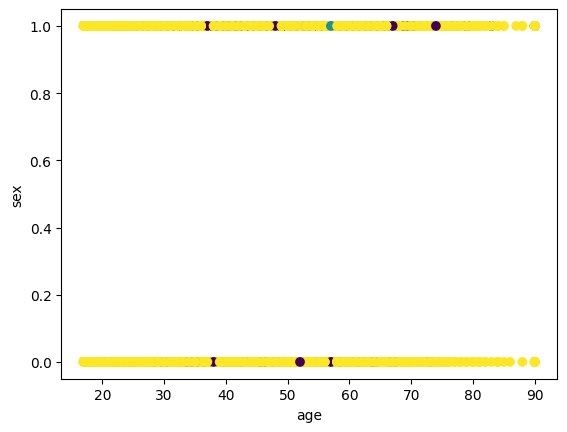

---------------------- (  age , workclass  ) ----------------------


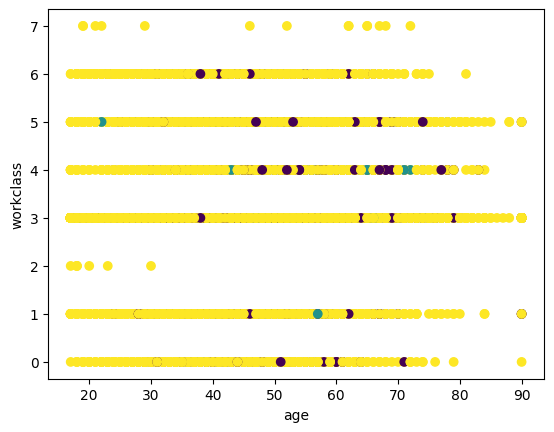

---------------------- (  age , education  ) ----------------------


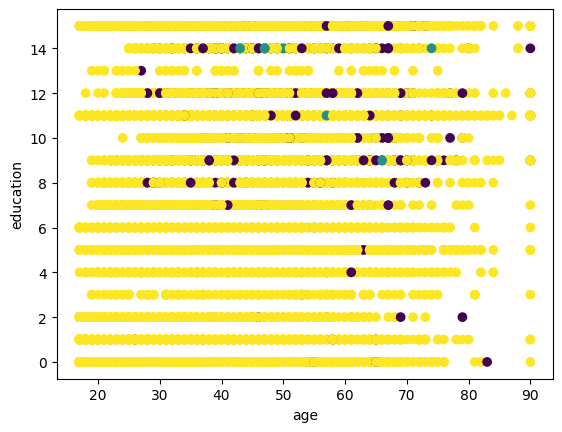

---------------------- (  age , education num  ) ----------------------


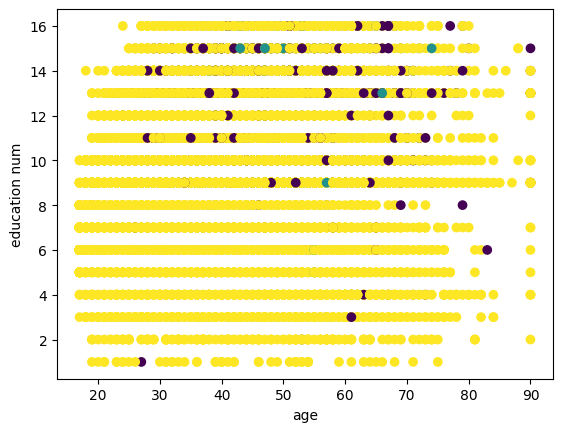

---------------------- (  age , capital-gain  ) ----------------------


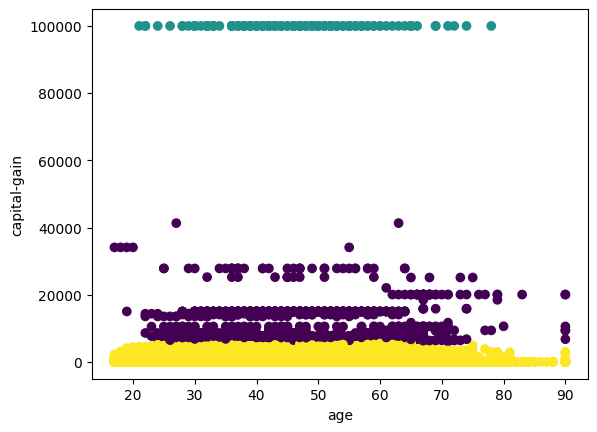

---------------------- (  age , capital-loss  ) ----------------------


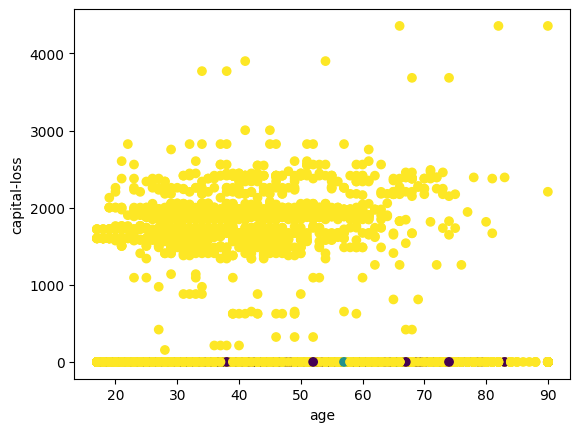

---------------------- (  age , hours-per-week  ) ----------------------


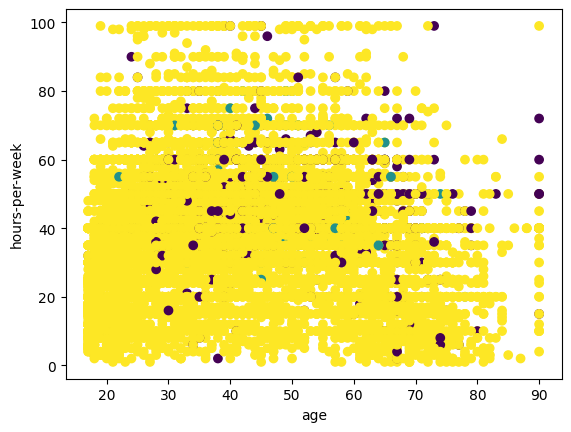

---------------------- (  sex , workclass  ) ----------------------


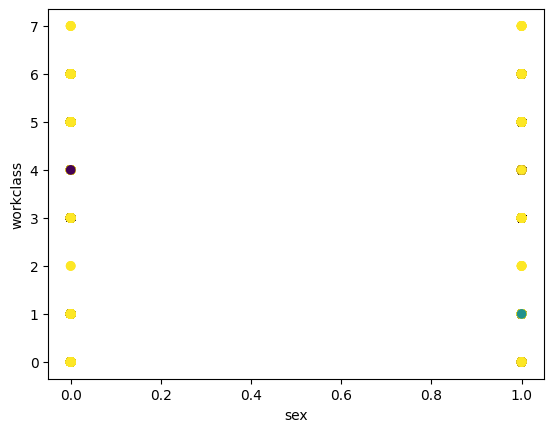

---------------------- (  sex , education  ) ----------------------


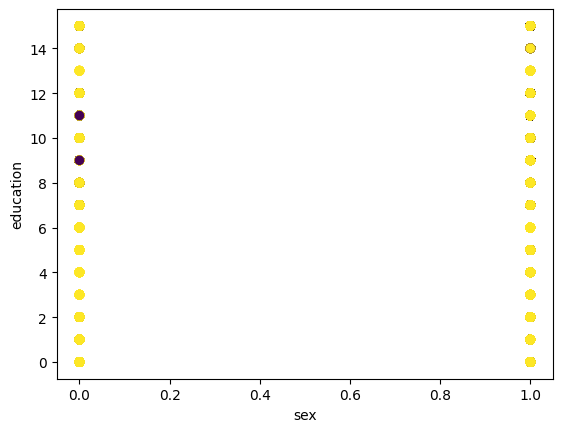

---------------------- (  sex , education num  ) ----------------------


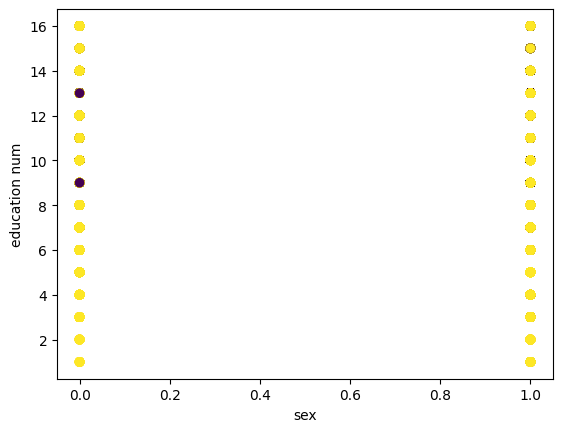

---------------------- (  sex , capital-gain  ) ----------------------


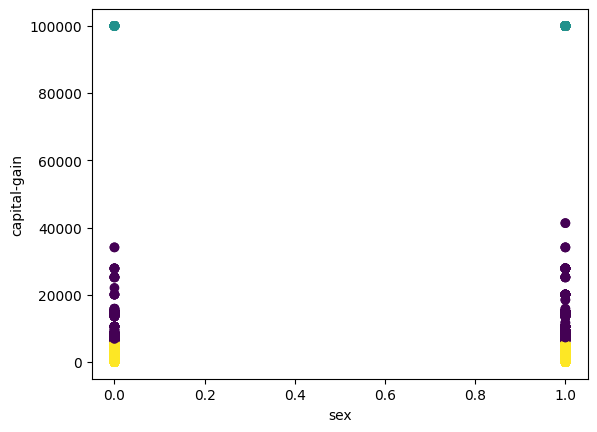

---------------------- (  sex , capital-loss  ) ----------------------


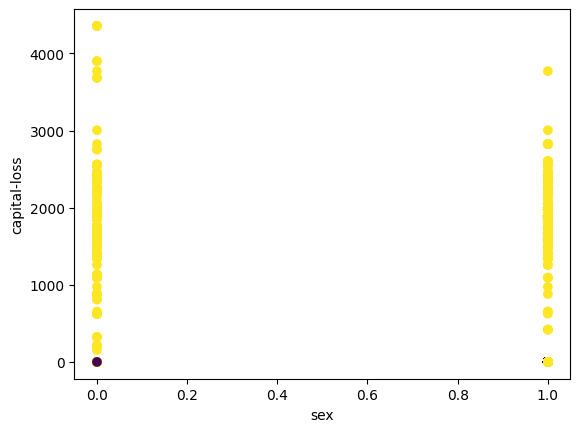

---------------------- (  sex , hours-per-week  ) ----------------------


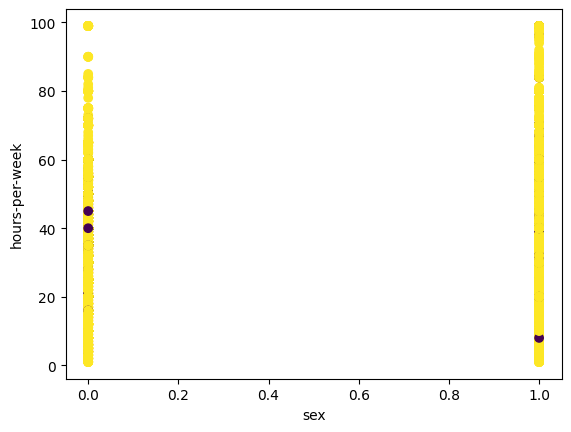

---------------------- (  workclass , education  ) ----------------------


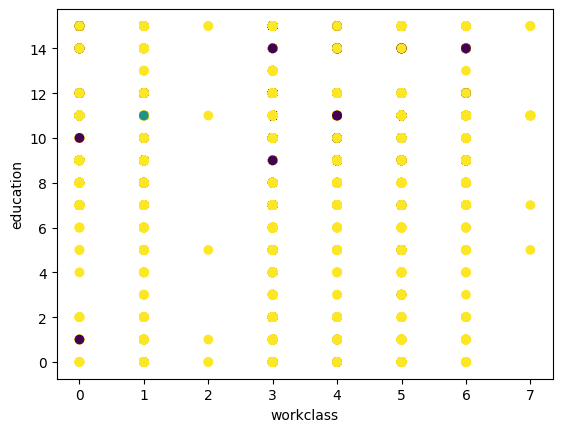

---------------------- (  workclass , education num  ) ----------------------


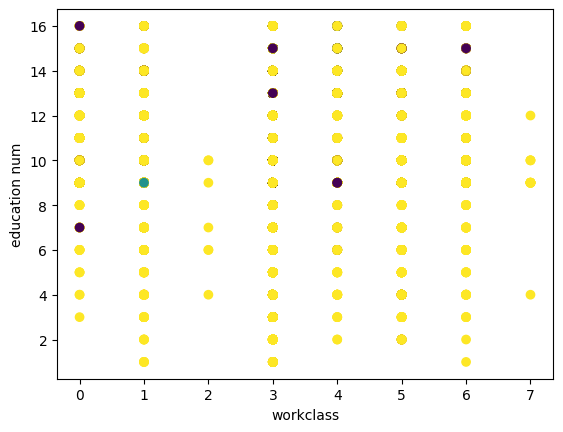

---------------------- (  workclass , capital-gain  ) ----------------------


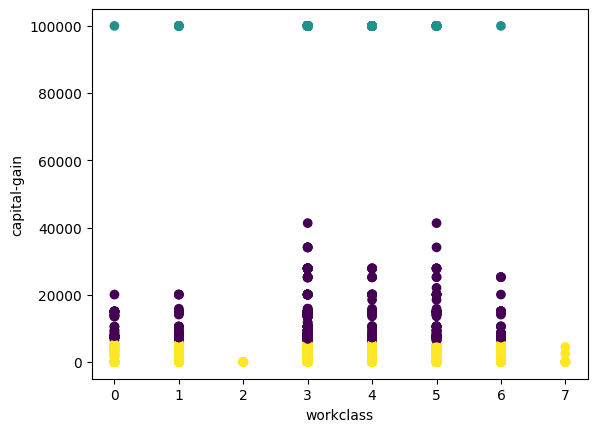

---------------------- (  workclass , capital-loss  ) ----------------------


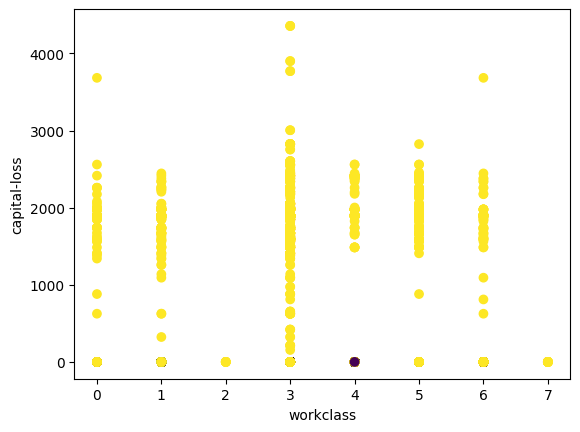

---------------------- (  workclass , hours-per-week  ) ----------------------


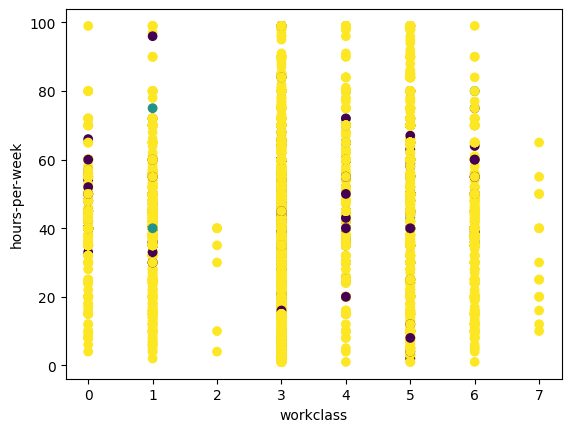

---------------------- (  education , education num  ) ----------------------


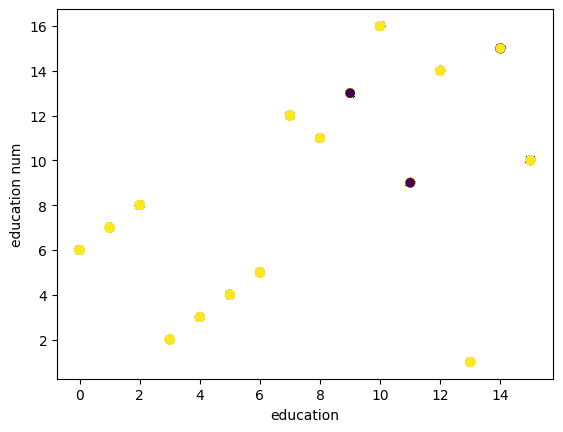

---------------------- (  education , capital-gain  ) ----------------------


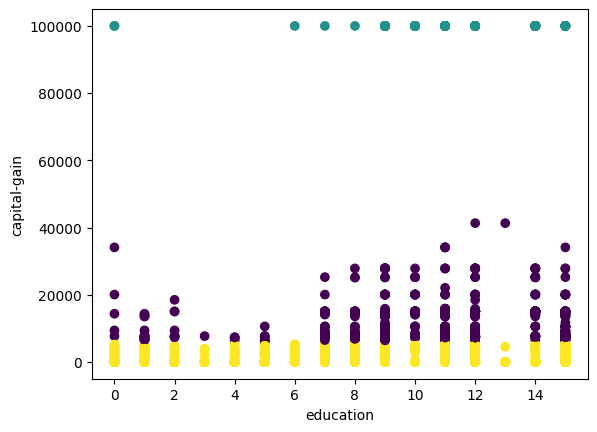

---------------------- (  education , capital-loss  ) ----------------------


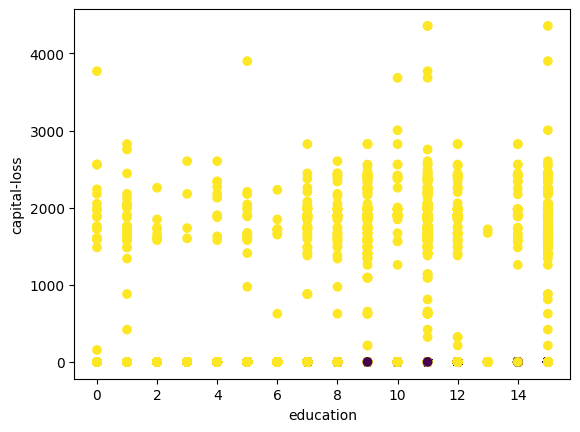

---------------------- (  education , hours-per-week  ) ----------------------


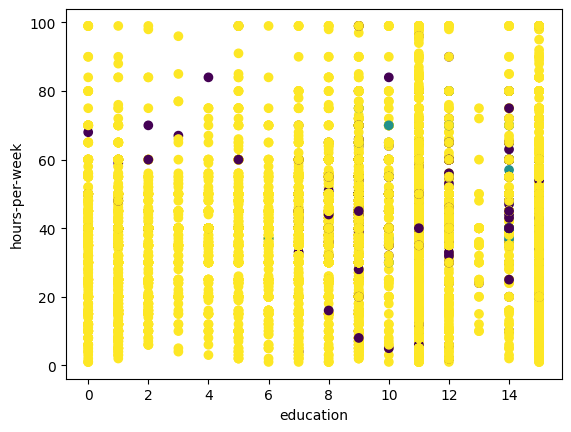

---------------------- (  education num , capital-gain  ) ----------------------


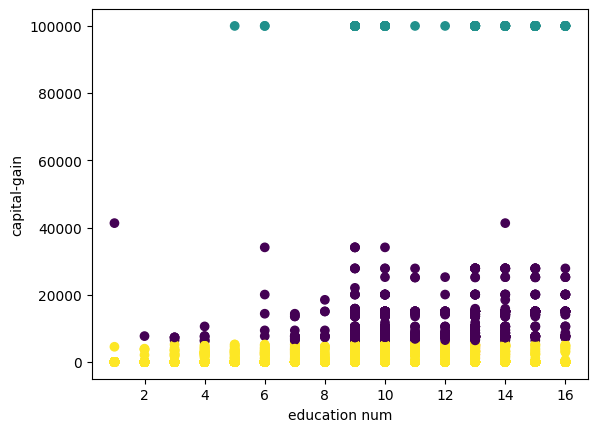

---------------------- (  education num , capital-loss  ) ----------------------


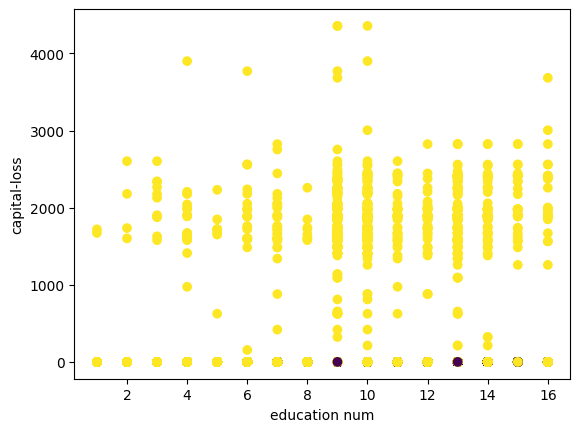

---------------------- (  education num , hours-per-week  ) ----------------------


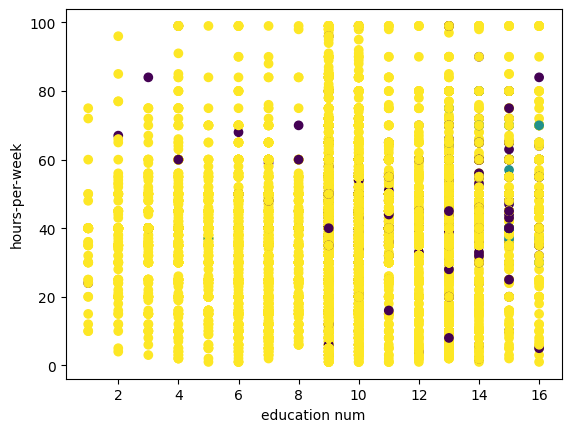

---------------------- (  capital-gain , capital-loss  ) ----------------------


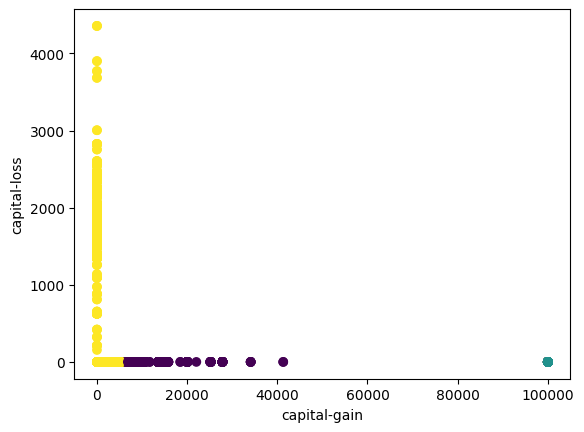

---------------------- (  capital-gain , hours-per-week  ) ----------------------


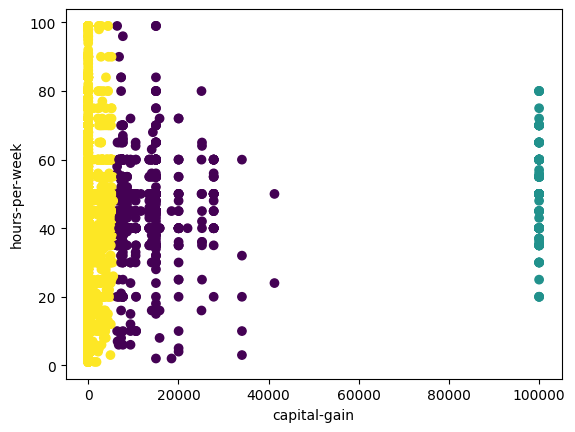

---------------------- (  capital-loss , hours-per-week  ) ----------------------


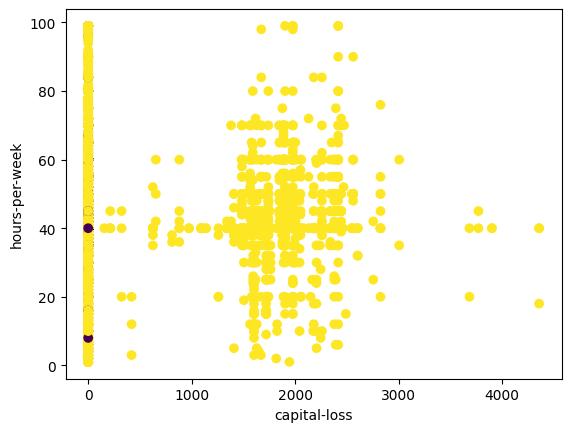

In [9]:

#===============================================================================
#============================== get Y_pred ( For Logistic Regression) =================================
#===============================================================================


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Get y_pred value using training datas and X_test data.
def get_y_pred(X_train,y_train,X_test):

    # Logistic Regression model
    log_reg = LogisticRegression()

    # fit training set
    log_reg.fit(X_train, y_train)

    # get y_pred using predict X_test.
    y_pred = log_reg.predict(X_test)

    print(y_pred)

    return y_pred




#===============================================================================
#============================== Modeling (Clustering) =================================
#===============================================================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import itertools

features = ['age', 'sex', 'workclass', 'education','education num',
                     'capital-gain','capital-loss','hours-per-week']

en_X=encoding_data

for combination in itertools.combinations(features, 2):
  combination=list(combination)
  f1=combination[0]
  f2=combination[1]

  # make clustering .
  kmeans = KMeans(n_clusters=3, random_state=0)

  # model fitting
  kmeans.fit(en_X)

  # get clustering labels_
  labels = kmeans.labels_

  print("---------------------- ( ",f1,",",f2," ) ----------------------")

  # Visualize
  # We have 8 features without outcome.
  # So, Make all available cases of features.

  plt.scatter(en_X[f1], en_X[f2] , c=labels)
  plt.xlabel(f1)
  plt.ylabel(f2)
  plt.show()



